In [3]:
## SVM model
import numpy as np
import pandas as pd
import pickle
from zipfile import ZipFile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
import sklearn

In [4]:
sklearn.__version__

'0.23.2'

In [5]:
## Read the different data parts
path_df = r"C:\Users\nikos\Desktop\Classify reviews\model_data\df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

path_X_train = r"C:\Users\nikos\Desktop\Classify reviews\model_data\X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

path_X_test = r"C:\Users\nikos\Desktop\Classify reviews\model_data\X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

path_y_train = r"C:\Users\nikos\Desktop\Classify reviews\model_data\y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

path_y_test = r"C:\Users\nikos\Desktop\Classify reviews\model_data\y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

In [6]:
print(X_train.shape)
print(X_test.shape)

(960, 293)
(241, 293)


In [7]:
## Train a SVM model
from sklearn import svm
svc_model =svm.SVC(random_state=42)
svc_model

SVC(random_state=42)

In [8]:
## Fit the model
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [9]:
## Pedictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = svc_model.predict(X_train)

## Training set Accuracy
print("Training set Accuracy is: ",accuracy_score(y_train, y_pred))

Training set Accuracy is:  0.9927083333333333


In [10]:
## Cross validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_model, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.875     , 0.84375   , 0.90625   , 0.875     , 0.84375   ,
       0.88541667, 0.875     , 0.86458333, 0.875     , 0.85416667])

## Tune the parameters We'll tune the following ones:
### C: Penalty parameter C of the error term.
### kernel: Specifies the kernel type.
### gamma: Kernel coefficient.
### degree: Degree of the polynomial kernel function.

In [11]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
#degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              #'degree': degree,
              'probability': probability
             }

print(random_grid)

{'C': [0.0001, 0.001, 0.01], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'probability': [True]}


In [12]:
# Random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
random_search = RandomizedSearchCV(estimator=svc_model,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  5.1min finished


The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.69375


In [15]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]



# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .10, random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc_model, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:  5.3min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.1, train_size=None),
             estimator=SVC(random_state=42),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             scoring='accuracy', verbose=1)

In [16]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.1, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.8055555555555555


In [17]:
best_svc_model = grid_search.best_estimator_
best_svc_model

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [18]:
## Fit the model
best_svc_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [19]:
## Predictions 
y_pred = best_svc_model.predict(X_train)

## Acuraccy
print("Train set Accuracy:",accuracy_score(y_train, y_pred))

Train set Accuracy: 0.884375


In [20]:
## Test set Accuracy
y_test_pred = best_svc_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_test_pred))

Test set Accuracy: 0.8464730290456431


In [21]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.96      0.62      0.76        40
           1       0.76      0.90      0.83        29
           2       0.85      0.81      0.83        21
           3       0.64      0.94      0.76        32
           4       0.82      0.79      0.81        34
           5       1.00      0.83      0.91        24
           6       0.96      0.96      0.96        28
           7       0.97      0.97      0.97        33

    accuracy                           0.85       241
   macro avg       0.87      0.85      0.85       241
weighted avg       0.87      0.85      0.85       241



<AxesSubplot:>

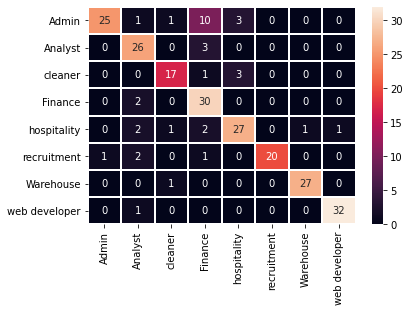

In [22]:
## Confusion matrix
encode = {'Admin':0, 'Analyst':1, 'cleaner':2, 'Finance':3, 'hospitality':4,
       'recruitment':5, 'Warehouse':6, 'web developer':7}
labels = [i for i in encode]
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [23]:
## Create a data freme with the model train, test set accuracy
D = {
     'Model': 'SVM',
     'Train Set Accuracy': accuracy_score(y_train,best_svc_model.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, y_test_pred)
}

svm_df = pd.DataFrame(D, index=[0])
svm_df

,Model,Train Set Accuracy,Test Set Accuracy
0,SVM,0.884375,0.846473


In [24]:
## Save the model and the dataframe
## Save the model
with open(r"C:\Users\nikos\Desktop\models_df\best_svm.pickle", 'wb') as output:
    pickle.dump(best_svc_model, output)

## Save the data frame
with open(r"C:\Users\nikos\Desktop\models_df\svm_df.pickle", 'wb') as output:
    pickle.dump(svm_df, output)